<span style="font-family: Verdana; font-weight:bold;font-size:1.3em;color:#B22222;">  Natural Language Processing - Sentiment Analysis
    
<span style="font-family: Verdana; font-weight:bold;font-size:1.0em;color:#4682B4;"> Machine Learning and Artificial Intelligence Course - Texas University
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> RAFAEL SOARES DE CARVALHO

<span style="font-family: Verdana; font-weight:bold; font-size:1.2em;color:#B22222;">  Objective: 

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')

In [647]:
#Import Libraries
import numpy as np   

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import pandas as pd    

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import scipy.stats as stats
from scipy.stats import zscore

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system


from sklearn.model_selection import GridSearchCV

from sklearn import model_selection
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format



from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster import hierarchy

import matplotlib.cm as cm
import statsmodels.api as sm



### Data

In [50]:
#Import Dataset
original_dataset = pd.read_csv("Tweets.csv")  # data as it is - to check consistency
data = pd.read_csv("Tweets.csv") # data to be manipulated

In [4]:
#Check import consistency
data.shape
#Review: Import Validated 14640 regs and 15 information collumns

(14640, 15)

In [5]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,nan,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,nan,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### 1 - Exploratory Data Quality Report - DATA UNDERSTANDING

In [6]:
#top200 view
data.head(20)
#top 20 rows for data exploration


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,nan,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,nan,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.00,Can't Tell,0.68,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.67,NaN,0.00,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.63,NaN,nan,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.66,NaN,nan,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.00,NaN,nan,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [7]:
# Using only descriptive data - remove customer and row identifiers
data = original_dataset.iloc[:,0:15]

In [8]:
#Check Data Types
data.dtypes

# No need to change data types for now

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [9]:
#Statistical information and summary
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,"14,640.00","14,640.00","10,522.00","14,640.00"
mean,"569,218,351,767,382,528.00",0.90,0.64,0.08
std,"779,111,158,481,836.75",0.16,0.33,0.75
min,"567,588,278,875,213,824.00",0.34,0.00,0.00
25%,"568,559,178,101,439,488.00",0.69,0.36,0.00
50%,"569,477,857,923,110,912.00",1.00,0.67,0.00
75%,"569,890,473,289,000,960.00",1.00,1.00,0.00
max,"570,310,600,460,525,568.00",1.00,1.00,44.00


In [10]:
#Check Data Infos
data.info()

# there are nulls values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [11]:
#Check Duplicated Rows
dup = original_dataset.duplicated()
sum(dup)
#There are duplicated as we have one line per customer
# 36 costumers with same values - usual and it's not an error

36

In [12]:
original_dataset[dup]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12040,570308309682675712,negative,1.00,Customer Service Issue,1.00,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12059,570305051819941889,neutral,1.00,NaN,nan,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
12063,570303383782989824,neutral,1.00,NaN,nan,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
12066,570301929580048385,neutral,1.00,NaN,nan,American,NaN,FinEdChat,NaN,0,@AmericanAir I did,NaN,2015-02-24 11:19:10 -0800,"Cincinnati, Ohio",Atlantic Time (Canada)
12068,570301395141836801,negative,1.00,Late Flight,1.00,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
12069,570300915418320897,negative,1.00,Cancelled Flight,1.00,American,NaN,LancasterPattie,NaN,0,@AmericanAir You are jumping the gun and Cance...,NaN,2015-02-24 11:15:08 -0800,NaN,NaN
12074,570299252141903873,positive,1.00,NaN,nan,American,NaN,Mtts28,NaN,0,@AmericanAir This is exactly why ill be flying...,NaN,2015-02-24 11:08:32 -0800,Virginia,Eastern Time (US & Canada)
12075,570298770136674304,negative,1.00,Customer Service Issue,1.00,American,NaN,law_econ,NaN,0,@AmericanAir This doesn't address my issue. I ...,NaN,2015-02-24 11:06:37 -0800,"Newport Beach, CA",Central Time (US & Canada)
12078,570298644475346945,negative,1.00,Customer Service Issue,1.00,American,NaN,denismishin,NaN,0,@AmericanAir submitted a case to AA customer r...,NaN,2015-02-24 11:06:07 -0800,"Bellevue, WA",Eastern Time (US & Canada)
12079,570298371140939776,negative,1.00,Late Flight,1.00,American,NaN,djjohnpayne,NaN,0,@AmericanAir if by near the gate you mean sitt...,"[0.0, 0.0]",2015-02-24 11:05:01 -0800,"Las Vegas, NV",Pacific Time (US & Canada)


In [13]:
#Check for Nulls
nulls = data.isnull().any()
print(nulls)
#Review: there are missing values

print('\n\n')
print(data.isnull().sum())

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool



tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                               

In [14]:
#IQR from each collumm
data.quantile(0.75) - data.quantile(0.25) 

tweet_id                       1,331,295,187,561,472.00
airline_sentiment_confidence                       0.31
negativereason_confidence                          0.64
retweet_count                                      0.00
dtype: float64

In [15]:
#Standard Deviation
print(data.std())

tweet_id                       779,111,158,481,836.75
airline_sentiment_confidence                     0.16
negativereason_confidence                        0.33
retweet_count                                    0.75
dtype: float64


In [16]:
#Covariance
cov_data = (data.cov())
cov_data

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,"607,014,197,270,909,814,914,890,596,352.00","3,151,321,480,220.26","5,444,471,970,264.09","-5,143,519,827,958.71"
airline_sentiment_confidence,"3,151,321,480,220.26",0.03,0.04,0.00
negativereason_confidence,"5,444,471,970,264.09",0.04,0.11,0.01
retweet_count,"-5,143,519,827,958.71",0.00,0.01,0.56


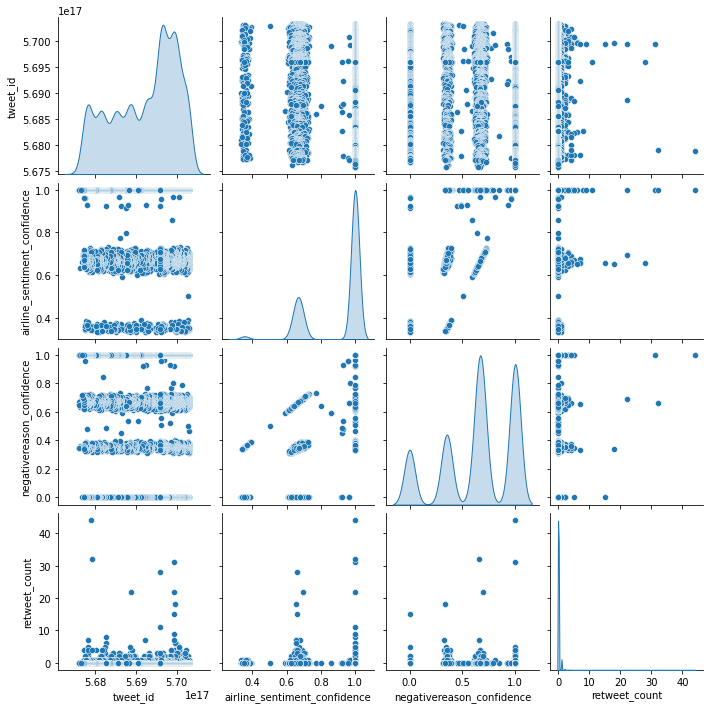

In [17]:
data_attr = data
sns.pairplot(data_attr, diag_kind='kde')

In [18]:
data.corr()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.00,0.02,0.02,-0.01
airline_sentiment_confidence,0.02,1.00,0.69,0.01
negativereason_confidence,0.02,0.69,1.00,0.02
retweet_count,-0.01,0.01,0.02,1.00


In [19]:
#skewness of data
data.iloc[:, 2:7].skew()

# simetric >-0.5 and <0.5
# moderate >-1 and <1
#  highly skewed < -1 or > 1

airline_sentiment_confidence   -1.24
negativereason_confidence      -0.60
dtype: float64

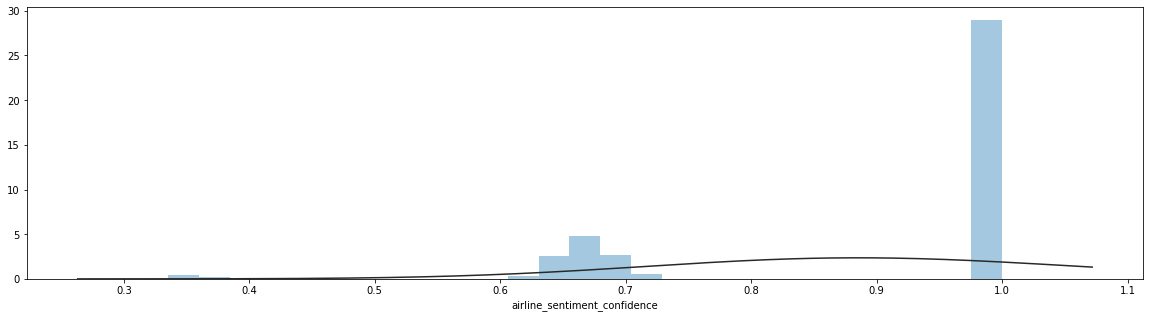

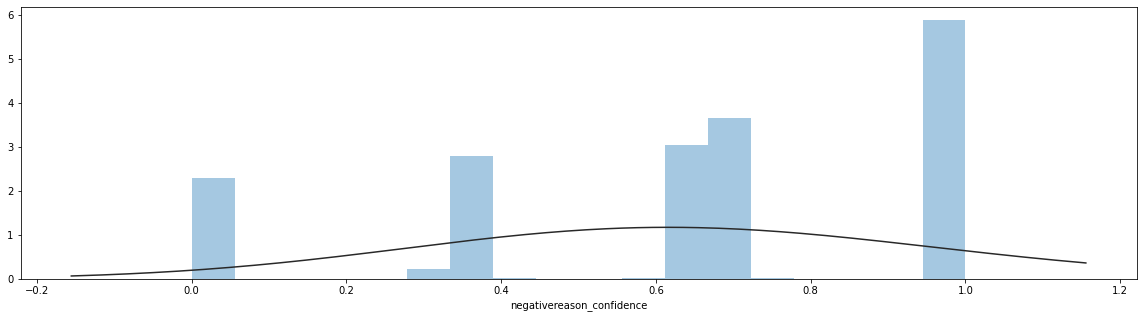

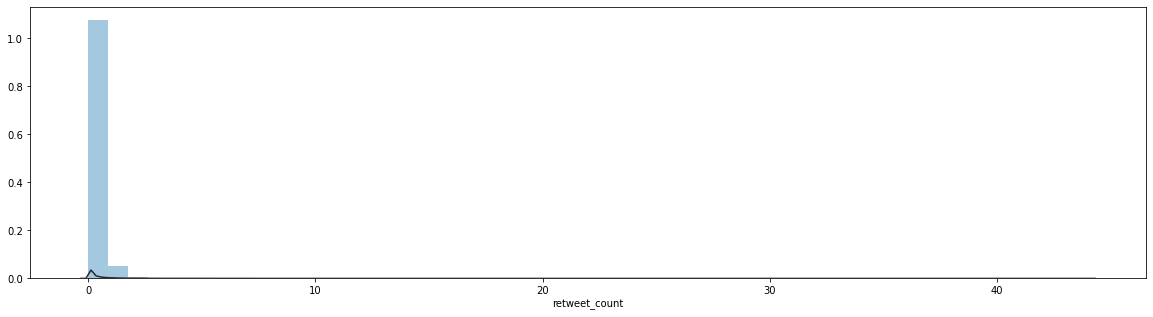

In [20]:
# Distplot for each collumn
for x, y in enumerate(data[["airline_sentiment_confidence","negativereason_confidence","retweet_count"]]):
    plt.figure(figsize=(20,5))
    sns.distplot(data[y],fit=stats.gamma,kde=False)
    plt.show()    

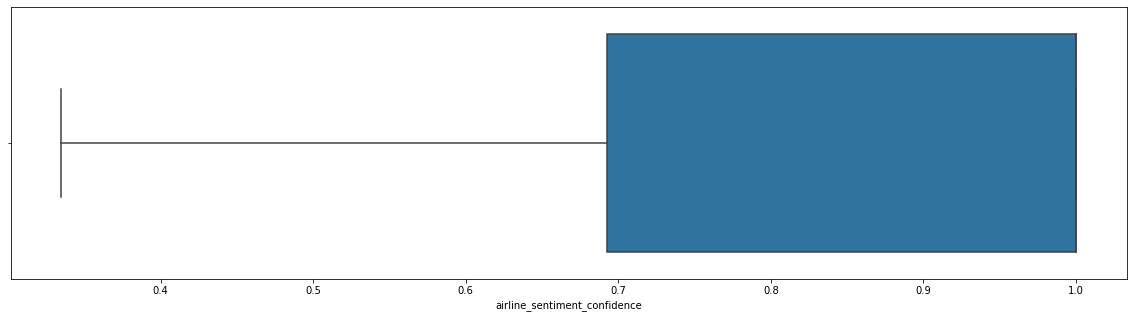

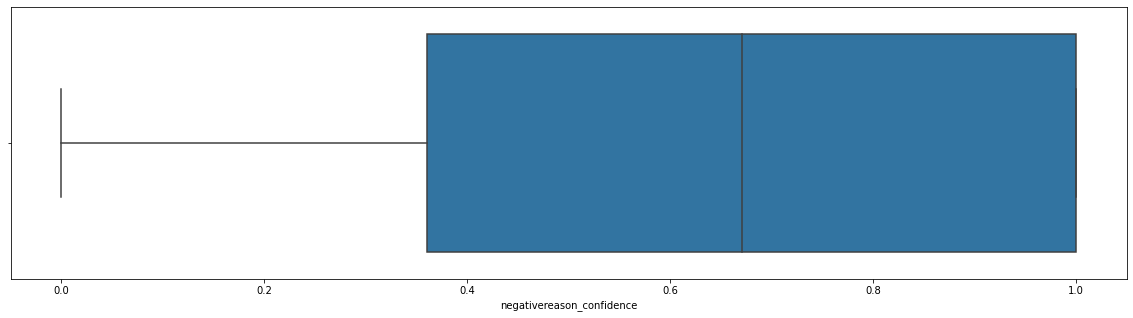

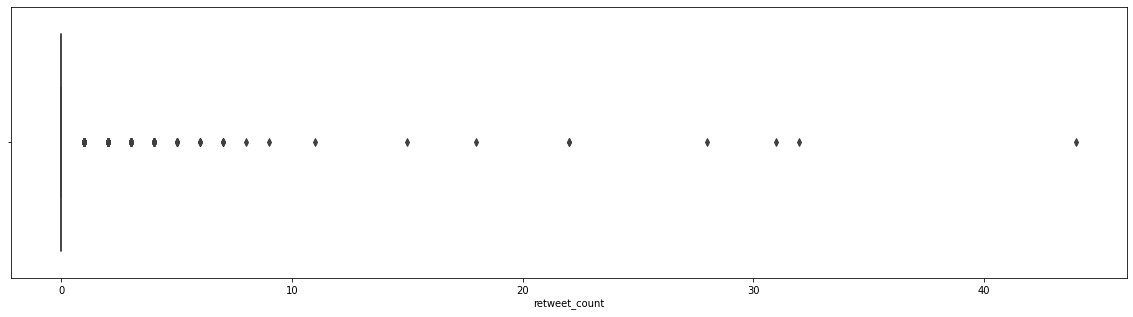

In [21]:
# Boxplot for each collumn
for x, y in enumerate(data[["airline_sentiment_confidence","negativereason_confidence","retweet_count"]]):
    plt.figure(figsize=(20,5))
    sns.boxplot(data[y])
    plt.show()    
    


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

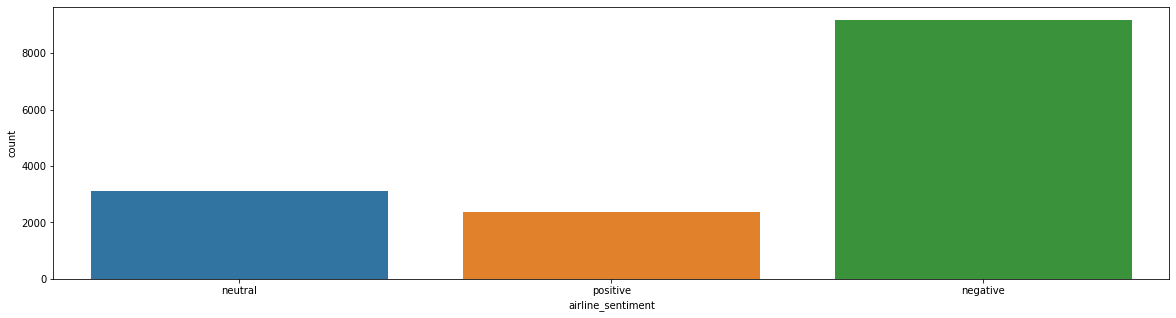

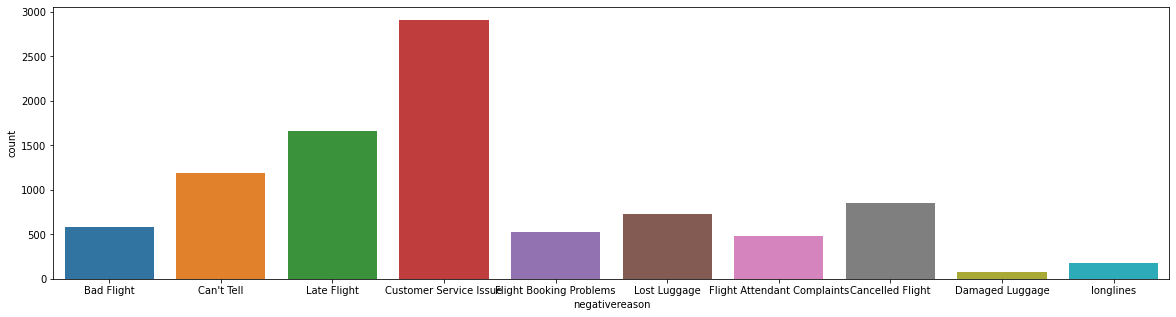

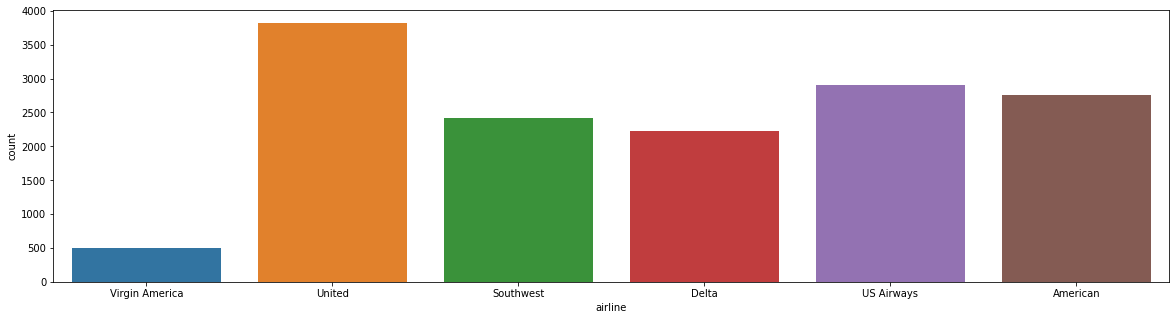

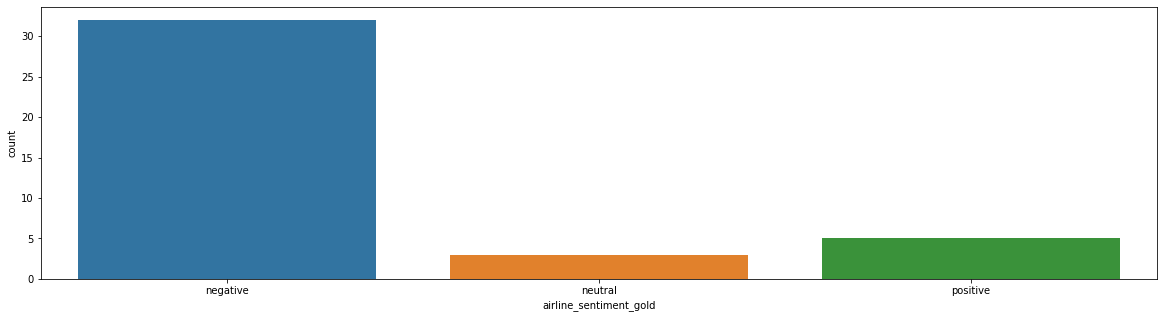

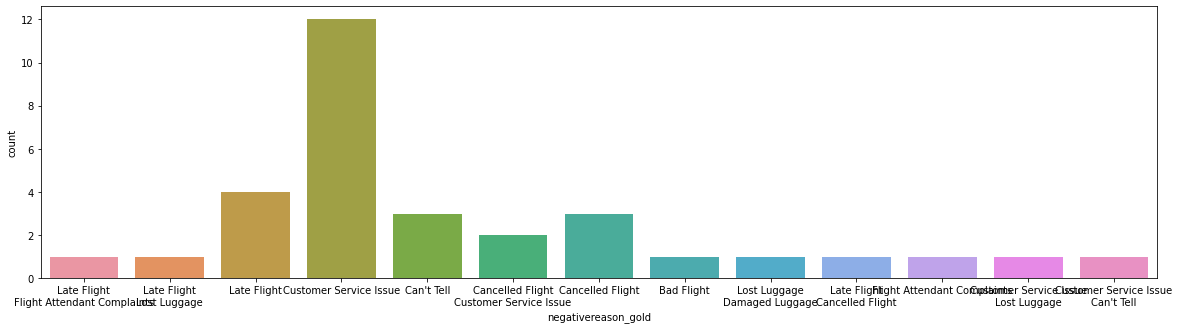

In [23]:
# COUNTPLOT for each collumn
for x, y in enumerate(data[["airline_sentiment","negativereason","airline","airline_sentiment_gold","negativereason_gold"]]):
    plt.figure(figsize=(20,5))
    sns.countplot(data[y])
    plt.show()    
    

In [41]:
data['airline_sentiment_cat'] = data['airline_sentiment'].astype('category')
pd.get_dummies(data['airline_sentiment'], drop_first=False)

,negative,neutral,positive
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
58555,0,0,0
58556,0,0,0
58557,0,0,0
58558,0,0,0


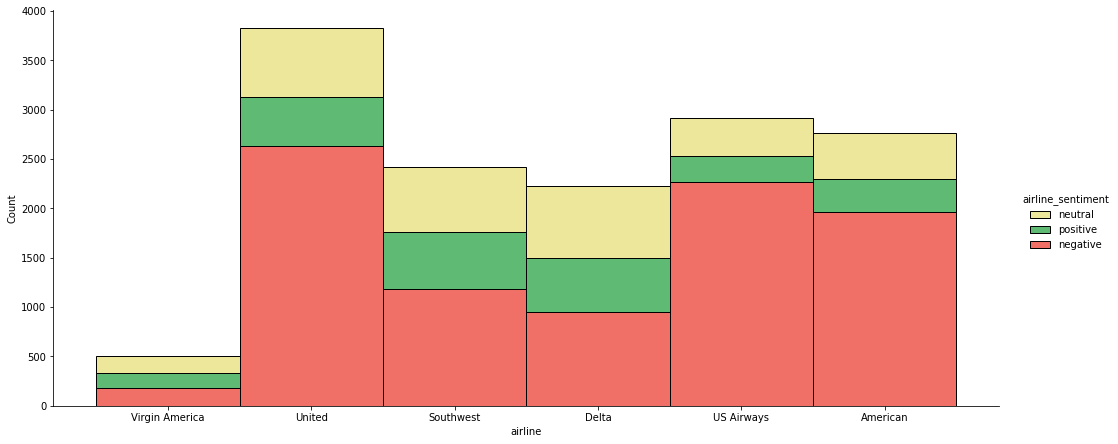

In [156]:
colors = ["#e6e07a", "#2aa345","#eb4034"]
sns.set_palette(sns.color_palette(colors))
sns.displot(x=data['airline'],hue=data['airline_sentiment'], multiple="stack", height=6.27, aspect=2.27)


## Understand of data-column

In [51]:
dumm = pd.get_dummies(data['airline_sentiment'], drop_first=False)

In [52]:
data["negative"] = dumm["negative"]
data["neutral"] = dumm["neutral"]
data["positive"] = dumm["positive"]

In [166]:
data.head(5)

,airline_sentiment,negative,neutral,positive,text
0,neutral,0,1,0,@VirginAmerica What @dhepburn said.
1,positive,0,0,1,@VirginAmerica plus you've added commercials t...
2,neutral,0,1,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1,0,0,@VirginAmerica it's really aggressive to blast...
4,negative,1,0,0,@VirginAmerica and it's a really big bad thing...


In [164]:
# Use Only Recomended Collumns
data = data[["airline_sentiment","negative","neutral","positive","text"]]

In [162]:
data.shape

(14640, 5)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   negative           14640 non-null  uint8 
 2   neutral            14640 non-null  uint8 
 3   positive           14640 non-null  uint8 
 4   text               14640 non-null  object
dtypes: object(2), uint8(3)
memory usage: 271.8+ KB


Histogram of number of characters on text


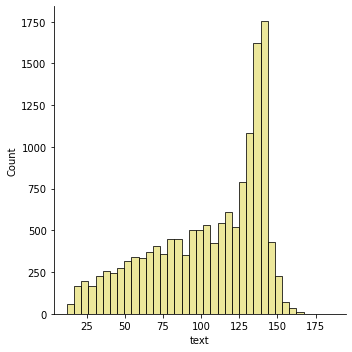

In [178]:
print("Histogram of number of characters on text")
sns.displot(data.text.str.len())


In [165]:
data.head(5)

,airline_sentiment,negative,neutral,positive,text
0,neutral,0,1,0,@VirginAmerica What @dhepburn said.
1,positive,0,0,1,@VirginAmerica plus you've added commercials t...
2,neutral,0,1,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1,0,0,@VirginAmerica it's really aggressive to blast...
4,negative,1,0,0,@VirginAmerica and it's a really big bad thing...


In [381]:
#data_bkp = data.copy() #for testing data
#data = data_bkp.copy() #for restoring data
#data["Origin_Text"] = data["text"] 


## Text pre-processing: Data preparation.

In [334]:
# Import necessary libraries.
import re, string, unicodedata
import pandas as pd
import nltk           

# Natural language processing tool-kit
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

#import contractions


from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [382]:
# save the stopwords in a list stopw.
stopw = stopwords.words('english')

In [383]:
# First row of data.
pd.set_option('display.max_colwidth', None) # It will enable the entire row visible with truncation of the text. (We can see full text.)
data.loc[0:40]

,airline_sentiment,negative,neutral,positive,text,Origin_Text
0,neutral,0,1,0,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.
1,positive,0,0,1,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,0,1,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,1,0,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1,0,0,@VirginAmerica and it's a really big bad thing about it,@VirginAmerica and it's a really big bad thing about it
5,negative,1,0,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,0,0,1,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)","@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,0,1,0,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP","@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,0,0,1,"@virginamerica Well, I didn't…but NOW I DO! :-D","@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,0,0,1,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.","@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


### a - HTML tag removal

In [384]:
# Removal of the http link using Regular Expression.
for i, row in data.iterrows():
    clean_text = re.sub(r"http\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text

In [385]:
print("Original: ",data_bkp.text.loc[21])
print("Without HTML: ",data.text.loc[21])

Original:  @VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA
Without HTML:  @VirginAmerica I love this graphic. 


In [386]:
# Removal of the "@Any_account" using Regular Expression.
for i, row in data.iterrows():
    clean_text = re.sub(r"@\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text

In [387]:
print("Original: ",data_bkp.text.loc[21])
print("Without @Account: ",data.text.loc[21])

Original:  @VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA
Without @Account:   I love this graphic. 


In [388]:
# Removal of the "#Hastags" using Regular Expression.
for i, row in data.iterrows():
    clean_text = re.sub(r"#\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text

In [389]:
print("Original: ",data_bkp.text.loc[35])
print("Without #Hastags: ",data.text.loc[35])

Original:  Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP
Without #Hastags:  Nice RT  Vibe with the moodlight from takeoff to touchdown.   


### C - Remove Numbers

In [390]:
# Remove numbers from data
for i, row in data.iterrows():
    clean_text = re.sub(r"[0-9_]+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text

In [391]:
print("Original: ",data_bkp.text.loc[10])
print("Without numbers: ",data.text.loc[10])

Original:  @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
Without numbers:   did you know that suicide is the second leading cause of death among teens -


### C - Special Characters and Pontuactions

In [392]:
# Remove non ASCII from data
for i, row in data.iterrows():
    clean_text = re.sub(r"[^\w\s]+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text

In [393]:
print("Original: ",data_bkp.text.loc[19])
print("Without Ponctuations: ",data.text.loc[19])

Original:  @VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.
Without Ponctuations:   you know what would be amazingly awesome BOSFLL PLEASE I want to fly with only you


In [394]:
# Remove non ASCII from data
for i, row in data.iterrows():
    clean_text = re.sub(r"[^A-Za-z _]+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text

In [395]:
print("Original: ",data_bkp.text.loc[35])
print("Without Ponctuations: ",data.text.loc[35])

Original:  Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP
Without Ponctuations:  Nice RT  Vibe with the moodlight from takeoff to touchdown   


### b - Tokenization

In [396]:
# Tokenize the words of whole dataframe.
for i, row in data.iterrows():
    text = data.at[i, 'text']
    words = nltk.word_tokenize(text)
    data.at[i,'text'] = words
data.head()

,airline_sentiment,negative,neutral,positive,text,Origin_Text
0,neutral,0,1,0,"[What, said]",@VirginAmerica What @dhepburn said.
1,positive,0,0,1,"[plus, youve, added, commercials, to, the, experience, tacky]",@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,0,1,0,"[I, didnt, today, Must, mean, I, need, to, take, another, trip]",@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,1,0,0,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]","@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1,0,0,"[and, its, a, really, big, bad, thing, about, it]",@VirginAmerica and it's a really big bad thing about it


### C - Conversion to LowerCase

In [397]:
def to_lowercase(words):
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [398]:
# Iterate the normalize funtion over whole data.
for i, row in data.iterrows():
    words = data.at[i, 'text']
    words = to_lowercase(words)
    data.at[i,'text'] = words
data.head()

,airline_sentiment,negative,neutral,positive,text,Origin_Text
0,neutral,0,1,0,"[what, said]",@VirginAmerica What @dhepburn said.
1,positive,0,0,1,"[plus, youve, added, commercials, to, the, experience, tacky]",@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,0,1,0,"[i, didnt, today, must, mean, i, need, to, take, another, trip]",@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,1,0,0,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]","@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1,0,0,"[and, its, a, really, big, bad, thing, about, it]",@VirginAmerica and it's a really big bad thing about it


In [399]:
print("Original: ",data_bkp.text.loc[35])
print("Lowercase: ",data.text.loc[35])

Original:  Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP
Lowercase:  ['nice', 'rt', 'vibe', 'with', 'the', 'moodlight', 'from', 'takeoff', 'to', 'touchdown']


## Lemmatize

In [400]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

In [401]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

In [402]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

In [403]:
# Lematize 
for i, row in data.iterrows():
    words = data.at[i, 'text']
    words = stem_and_lemmatize(words)
    data.at[i,'text'] = words
data.head()

,airline_sentiment,negative,neutral,positive,text,Origin_Text
0,neutral,0,1,0,"([what, said], [what, say])",@VirginAmerica What @dhepburn said.
1,positive,0,0,1,"([plu, youv, ad, commerc, to, the, expery, tacky], [plus, youve, add, commercials, to, the, experience, tacky])",@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,0,1,0,"([i, didnt, today, must, mean, i, nee, to, tak, anoth, trip], [i, didnt, today, must, mean, i, need, to, take, another, trip])",@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,1,0,0,"([it, real, aggress, to, blast, obnoxy, entertain, in, yo, guest, fac, amp, they, hav, littl, recours], [its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, face, amp, they, have, little, recourse])","@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1,0,0,"([and, it, a, real, big, bad, thing, about, it], [and, its, a, really, big, bad, thing, about, it])",@VirginAmerica and it's a really big bad thing about it


In [404]:
# JoinData
for i, row in data.iterrows():
    words = data.at[i, 'text']
    words =  " ".join(data.text[i][0])
    data.at[i,'steam_text'] = words


In [405]:
# JoinData
for i, row in data.iterrows():
    words = data.at[i, 'text']
    words =  " ".join(data.text[i][1])
    data.at[i,'lema_text'] = words

In [406]:
data.head(5)

,airline_sentiment,negative,neutral,positive,text,Origin_Text,steam_text,lema_text
0,neutral,0,1,0,"([what, said], [what, say])",@VirginAmerica What @dhepburn said.,what said,what say
1,positive,0,0,1,"([plu, youv, ad, commerc, to, the, expery, tacky], [plus, youve, add, commercials, to, the, experience, tacky])",@VirginAmerica plus you've added commercials to the experience... tacky.,plu youv ad commerc to the expery tacky,plus youve add commercials to the experience tacky
2,neutral,0,1,0,"([i, didnt, today, must, mean, i, nee, to, tak, anoth, trip], [i, didnt, today, must, mean, i, need, to, take, another, trip])",@VirginAmerica I didn't today... Must mean I need to take another trip!,i didnt today must mean i nee to tak anoth trip,i didnt today must mean i need to take another trip
3,negative,1,0,0,"([it, real, aggress, to, blast, obnoxy, entertain, in, yo, guest, fac, amp, they, hav, littl, recours], [its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, face, amp, they, have, little, recourse])","@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it real aggress to blast obnoxy entertain in yo guest fac amp they hav littl recours,its really aggressive to blast obnoxious entertainment in your guests face amp they have little recourse
4,negative,1,0,0,"([and, it, a, real, big, bad, thing, about, it], [and, its, a, really, big, bad, thing, about, it])",@VirginAmerica and it's a really big bad thing about it,and it a real big bad thing about it,and its a really big bad thing about it


## Vectorization

In [408]:
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

In [429]:
cv = CountVectorizer()  
X = cv.fit_transform(data["lema_text"])
print(cv.vocabulary_)
print(X.shape)
print(type(X))
print(X.toarray())

{'what': 9140, 'say': 7255, 'plus': 6332, 'youve': 9430, 'add': 110, 'commercials': 1629, 'to': 8384, 'the': 8239, 'experience': 2909, 'tacky': 8105, 'didnt': 2294, 'today': 8388, 'must': 5476, 'mean': 5130, 'need': 5552, 'take': 8116, 'another': 402, 'trip': 8530, 'its': 4394, 'really': 6748, 'aggressive': 187, 'blast': 927, 'obnoxious': 5760, 'entertainment': 2737, 'in': 4120, 'your': 9422, 'guests': 3653, 'face': 2950, 'amp': 346, 'they': 8258, 'have': 3744, 'little': 4838, 'recourse': 6797, 'and': 370, 'big': 883, 'bad': 702, 'thing': 8268, 'about': 32, 'it': 4373, 'seriously': 7390, 'would': 9305, 'pay': 6119, 'flight': 3140, 'for': 3266, 'seat': 7322, 'that': 8232, 'this': 8277, 'playingits': 6302, 'only': 5857, 'fly': 3229, 'va': 8867, 'yes': 9395, 'nearly': 5548, 'every': 2825, 'time': 8344, 'vx': 8997, 'ear': 2572, 'worm': 9292, 'wont': 9269, 'go': 3526, 'away': 662, 'miss': 5320, 'prime': 6500, 'opportunity': 5884, 'men': 5179, 'without': 9236, 'hat': 3738, 'parody': 6070, 't

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [422]:
vocab = cv.get_feature_names()
print (vocab)

['aa', 'aaaand', 'aaba', 'aadavantage', 'aadfw', 'aadv', 'aadvantage', 'aal', 'aampc', 'aano', 'aaron', 'aas', 'aaso', 'aaus', 'ab', 'aback', 'abandon', 'abandonment', 'abassinet', 'abbreve', 'abc', 'abcdef', 'abcs', 'abduct', 'abi', 'abidfw', 'abilities', 'ability', 'able', 'aboard', 'aboout', 'abound', 'about', 'above', 'abq', 'abroad', 'absolute', 'absolutely', 'absorb', 'absorber', 'absoulutely', 'absurd', 'absurdity', 'absurdly', 'abt', 'abundance', 'abuse', 'abysmal', 'ac', 'acarl', 'acc', 'accelerate', 'accept', 'acceptable', 'acces', 'access', 'accessible', 'accident', 'accidentally', 'accidents', 'accomidating', 'accommodate', 'accommodation', 'accommodations', 'accompaniments', 'accompany', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accountable', 'accrue', 'acct', 'acctits', 'accts', 'accumulation', 'accurate', 'accurately', 'accuse', 'achieve', 'ack', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acosta', 'acoustic', 'acpt', 'acquire', 'acqui

In [424]:
tfidf = TfidfVectorizer(vocabulary = vocab, ngram_range = (1,2))
tfs = tfidf.fit_transform(data["lema_text"])
feature_names = tfidf.get_feature_names()
data_index = [n for n in data["lema_text"]]
df = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=data_index)
print(tfidf.vocabulary_)
print(tfidf.idf_)
print(tfs.shape)
print(df)


{'aa': 0, 'aaaand': 1, 'aaba': 2, 'aadavantage': 3, 'aadfw': 4, 'aadv': 5, 'aadvantage': 6, 'aal': 7, 'aampc': 8, 'aano': 9, 'aaron': 10, 'aas': 11, 'aaso': 12, 'aaus': 13, 'ab': 14, 'aback': 15, 'abandon': 16, 'abandonment': 17, 'abassinet': 18, 'abbreve': 19, 'abc': 20, 'abcdef': 21, 'abcs': 22, 'abduct': 23, 'abi': 24, 'abidfw': 25, 'abilities': 26, 'ability': 27, 'able': 28, 'aboard': 29, 'aboout': 30, 'abound': 31, 'about': 32, 'above': 33, 'abq': 34, 'abroad': 35, 'absolute': 36, 'absolutely': 37, 'absorb': 38, 'absorber': 39, 'absoulutely': 40, 'absurd': 41, 'absurdity': 42, 'absurdly': 43, 'abt': 44, 'abundance': 45, 'abuse': 46, 'abysmal': 47, 'ac': 48, 'acarl': 49, 'acc': 50, 'accelerate': 51, 'accept': 52, 'acceptable': 53, 'acces': 54, 'access': 55, 'accessible': 56, 'accident': 57, 'accidentally': 58, 'accidents': 59, 'accomidating': 60, 'accommodate': 61, 'accommodation': 62, 'accommodations': 63, 'accompaniments': 64, 'accompany': 65, 'accomplish': 66, 'accord': 67, 'acc

In [430]:
df.head()

,what say,plus youve add commercials to the experience tacky,i didnt today must mean i need to take another trip,its really aggressive to blast obnoxious entertainment in your guests face amp they have little recourse,and its a really big bad thing about it,seriously would pay a flight for seat that didnt have this playingits really the only bad thing about fly va,yes nearly every time i fly vx this ear worm wont go away,really miss a prime opportunity for men without hat parody there,well i didntbut now i do d,it be amaze and arrive an hour early youre too good to me,...,thank he be,thx for nothing on get us out of the country and back to us break plane come on get another one,george that doesnt look good please follow this link to start the refund process,my flight be cancel flightled leave tomorrow morning auto rebooked for a tuesday night flight but need to arrive monday,right on cue with the delay,thank you we get on a different flight to chicago,leave over minutes late flight no warn or communication until we be minutes late flight thats call shitty customer svc,please bring american airlines to,you have my money you change my flight and dont answer your phone any other suggestions so i can make my commitment,we have ppl so we need know how many seat be on the next flight plz put us on standby for people on the next flight
aa,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
aaaand,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
aaba,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
aadavantage,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
aadfw,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Model

In [591]:
# Create Train and Text Data
X_train, X_test, y_train, y_test = train_test_split(data["lema_text"], data['airline_sentiment'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((10248,), (4392,))

#### CountVectorizer

In [450]:
cv = CountVectorizer()  
train_data_features = cv.fit_transform(X_train,y_train)
train_data_features = train_data_features.toarray()

In [451]:
#Train Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(verbose=2,n_jobs=-1,n_estimators = 100) 

print ("Training the random forest...")
forest = forest.fit(train_data_features,y_train )

Training the random forest...
building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.1s finished


In [452]:
# random forest performance through cross vaidation 
#print (forest)
#print (np.mean(cross_val_score(forest,,data["airline_sentiment"],cv=10)))

In [472]:
#Test Model

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = cv.transform(X_test)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)
print (result)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":y_test, "sentiment":result} )



[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [621]:
#result_float = np.where(result=='negative', -1, np.where(result=='neutral', 0, np.where(result=='positive', 1, result) ) ) 

#y_test_float = np.where(y_test=='negative', -1, np.where(y_test=='neutral', 0, np.where(y_test=='positive', 1, y_test)))


result_df = pd.DataFrame(result,  index =[i for i in range(len(result))] ,columns = ["result"])
y_test_df = pd.DataFrame(y_test.values,  index =[i for i in range(len(y_test.values))] ,columns = ["y_test"])
prediction = pd.concat([result_df,y_test_df],axis=1,sort=False)

In [626]:
#prediction['result_float'] = prediction['result'].replace({'positive': 0, 'negative': 1,'neutral':2})
#prediction['y_test_float'] = prediction['y_test'].replace({'positive': 0, 'negative': 1,'neutral':2})

In [627]:
prediction.value_counts()

result    y_test  
negative  negative    2657
          neutral      506
positive  positive     368
neutral   neutral      362
negative  positive     257
neutral   negative      78
          positive      65
positive  neutral       62
          negative      37
dtype: int64

#### TfidfVectorizer

In [635]:
tfidf = TfidfVectorizer(vocabulary = vocab, ngram_range = (1,2))
tfs = tfidf.fit_transform(X_train,y_train)
feature_names = tfidf.get_feature_names()
data_index = [n for n in X_train]
df = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=data_index)

train_data_features2 = tfs.toarray()

In [636]:
#Train Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest2 = RandomForestClassifier(verbose=2,n_jobs=-1,n_estimators = 100) 

print ("Training the random forest...")
forest2 = forest2.fit(train_data_features2,y_train )

Training the random forest...
building tree 1 of 100building tree 2 of 100building tree 3 of 100


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100building tree 7 of 100

building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.8s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.8s finished


In [637]:
#Test Model

# Get a bag of words for the test set, and convert to a numpy array
test_data_features2 = tfidf.transform(X_test)
test_data_features2 = test_data_features2.toarray()

# Use the random forest to make sentiment label predictions
result2 = forest2.predict(test_data_features2)
print (result2)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output2 = pd.DataFrame( data={"id":y_test, "sentiment":result2} )


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s


['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [638]:
result_df2 = pd.DataFrame(result2,  index =[i for i in range(len(result2))] ,columns = ["result"])
y_test_df2 = pd.DataFrame(y_test.values,  index =[i for i in range(len(y_test.values))] ,columns = ["y_test"])
prediction2 = pd.concat([result_df2,y_test_df2],axis=1,sort=False)
prediction2.value_counts()

result    y_test  
negative  negative    2671
          neutral      550
neutral   neutral      324
positive  positive     318
negative  positive     313
neutral   negative      73
          positive      59
positive  neutral       56
          negative      28
dtype: int64

# Analisys

In [646]:
# For modeling using CV we have:
correct_prediction_cv = (2657 + 368 + 362)/len(result)
print("cv Accuracy on prediction",round(correct_prediction_cv*100,2),"%")

correct_prediction_tfidf = (2671 + 324 + 318)/len(result2)
print("tfidf Accuracy on prediction",round(correct_prediction_tfidf*100,2),"%")

cv Accuracy on prediction 77.12 %
tfidf Accuracy on prediction 75.43 %
